In [2]:
from importlib import reload
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# Add the project root to the path
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, project_root)

import pacing_auction.data as data
import pacing_auction.auction as auction
import pacing_auction.elimination as elimination
import pacing_auction.generator as generator
reload(data)
reload(elimination)
reload(auction)
reload(generator)

sns.set_theme("paper")

In [3]:
def print_result(sim: auction.Auction, res: auction.BRDResult):
    print(f"Result:             {type(res)}")
    print(f"Iterations:         {res.iteration}")
    print(f"Time per Iteration: {1000 * round(res.stats["time"] / res.iteration, 4)}ms")
    print(f"Time:               {res.stats['time']:.2f}s")
    if "cycle_length" in res.stats:
        print(f"Cycle length      : {res.stats["cycle_length"]}")
    print(f"Seed:               {sim.seed}")

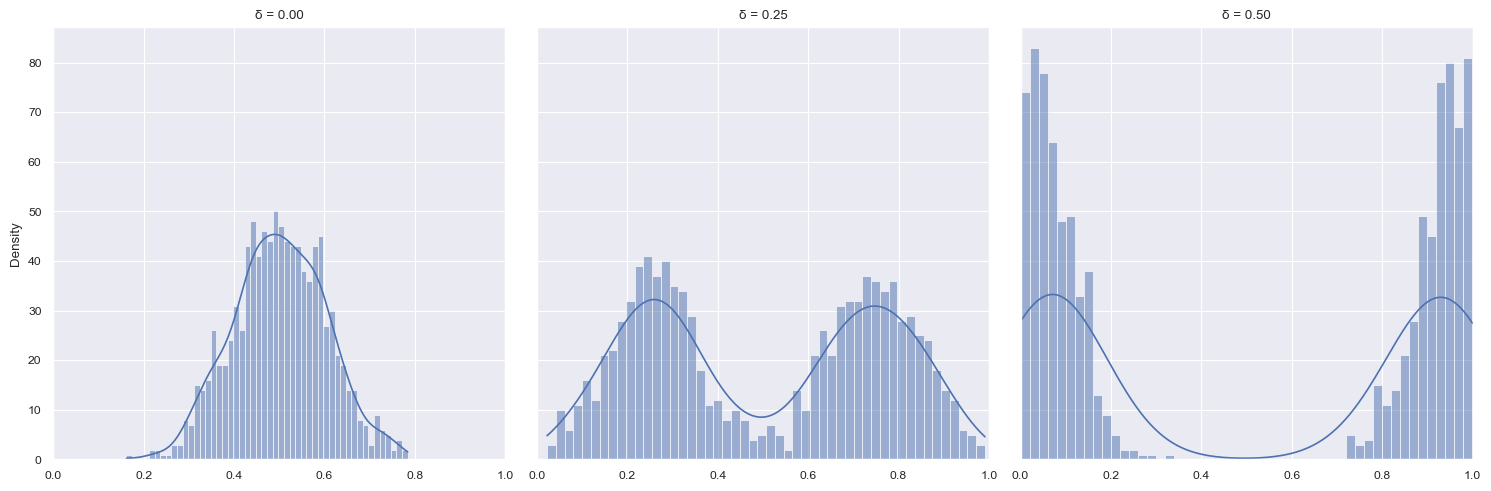

In [4]:
# Set seaborn theme
sns.set_theme("paper")

def sample(delta, sigma, mu=0.5) -> float:
    comp_mu = mu - delta if np.random.rand() < 0.5 else mu + delta
    a, b = (0 - comp_mu) / sigma, (1 - comp_mu) / sigma
    return stats.truncnorm.rvs(a, b, loc=comp_mu, scale=sigma) # type: ignore

# Parameters
delta_values = [0, 0.25, 0.5]
sigma = 0.1
n_samples = 1000

# Plot histograms
fig, axes = plt.subplots(1, len(delta_values), figsize=(15, 5), sharey=True)
for ax, delta in zip(axes, delta_values):
    samples: list[float] = [sample(delta, sigma) for _ in range(n_samples)]
    sns.histplot(samples, bins=50, kde=True, ax=ax)
    ax.set_title(f"δ = {delta:.2f}")
    ax.set_xlim(0, 1)

axes[0].set_ylabel("Density")
plt.tight_layout()
# plt.savefig("/Users/khalid/Desktop/honours-project-writeup/figures/mixed_gaussian_samples.png", dpi=500)
plt.show()


<Axes: title={'center': 'Utility of bidder 1 for different values of alpha_q'}, xlabel='alpha_q', ylabel='utility'>

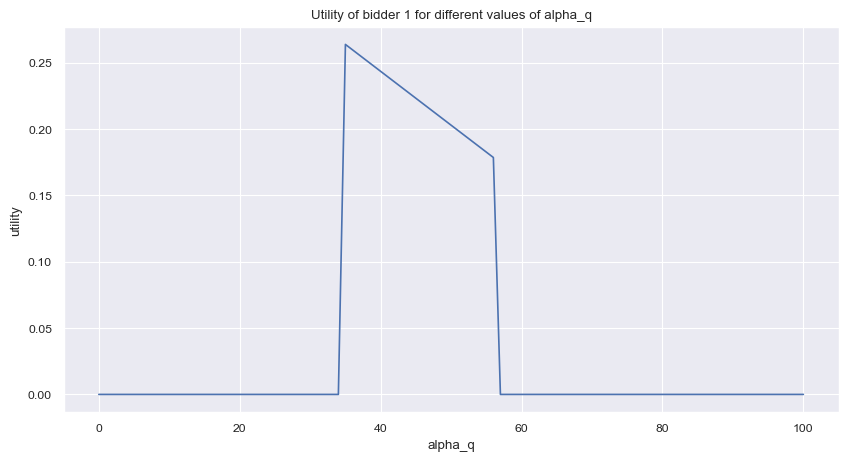

In [6]:
n, m, q = 5, 5, 100
sim = auction.Auction(n, m, q)
bids = sim.bids()
bidder = 1
utils = []
for alpha in range(q + 1):
    x, p = sim.auction(adjustment=(bidder, alpha))
    utils.append(sim.utility(x, p)[bidder])

plt.figure(figsize=(10, 5))
plt.title(f"Utility of bidder 1 for different values of alpha_q")
plt.xlabel("alpha_q")
plt.ylabel("utility")
sns.lineplot(x=range(len(utils)), y=utils)
# plt.savefig("/Users/khalid/Desktop/honours-project-writeup/figures/utility-alpha-q.png", dpi=500, bbox_inches="tight")


[[0.76007376 0.90849011 0.06525632 0.6524754  0.79665851]
 [0.58587919 0.09008699 0.43454492 0.24718088 0.97535467]
 [0.95579772 0.73778748 0.48463604 0.06284705 0.26325928]
 [0.18955053 0.51628927 0.77614821 0.71125908 0.19400253]
 [0.98896068 0.08465449 0.44392385 0.98150939 0.72273186]]
Result:             <class 'pacing_auction.data.Cycle'>
Iterations:         3271
Time per Iteration: 2.0ms
Time:               6.38s
Cycle length      : 194
Seed:               2329336884


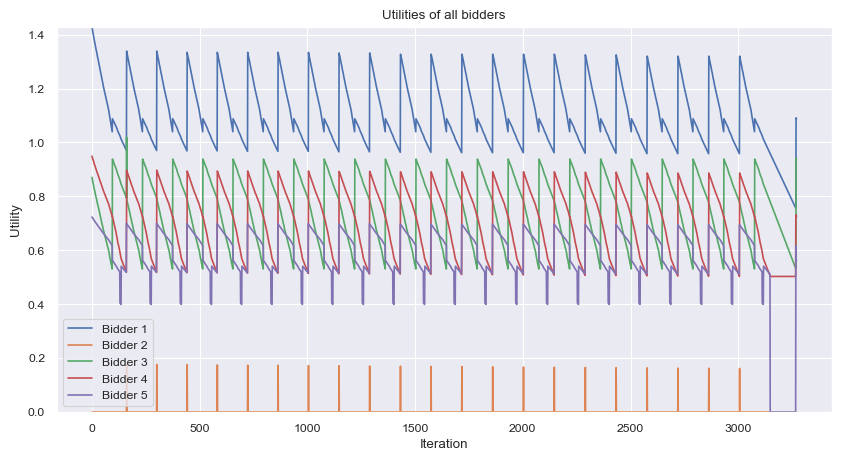

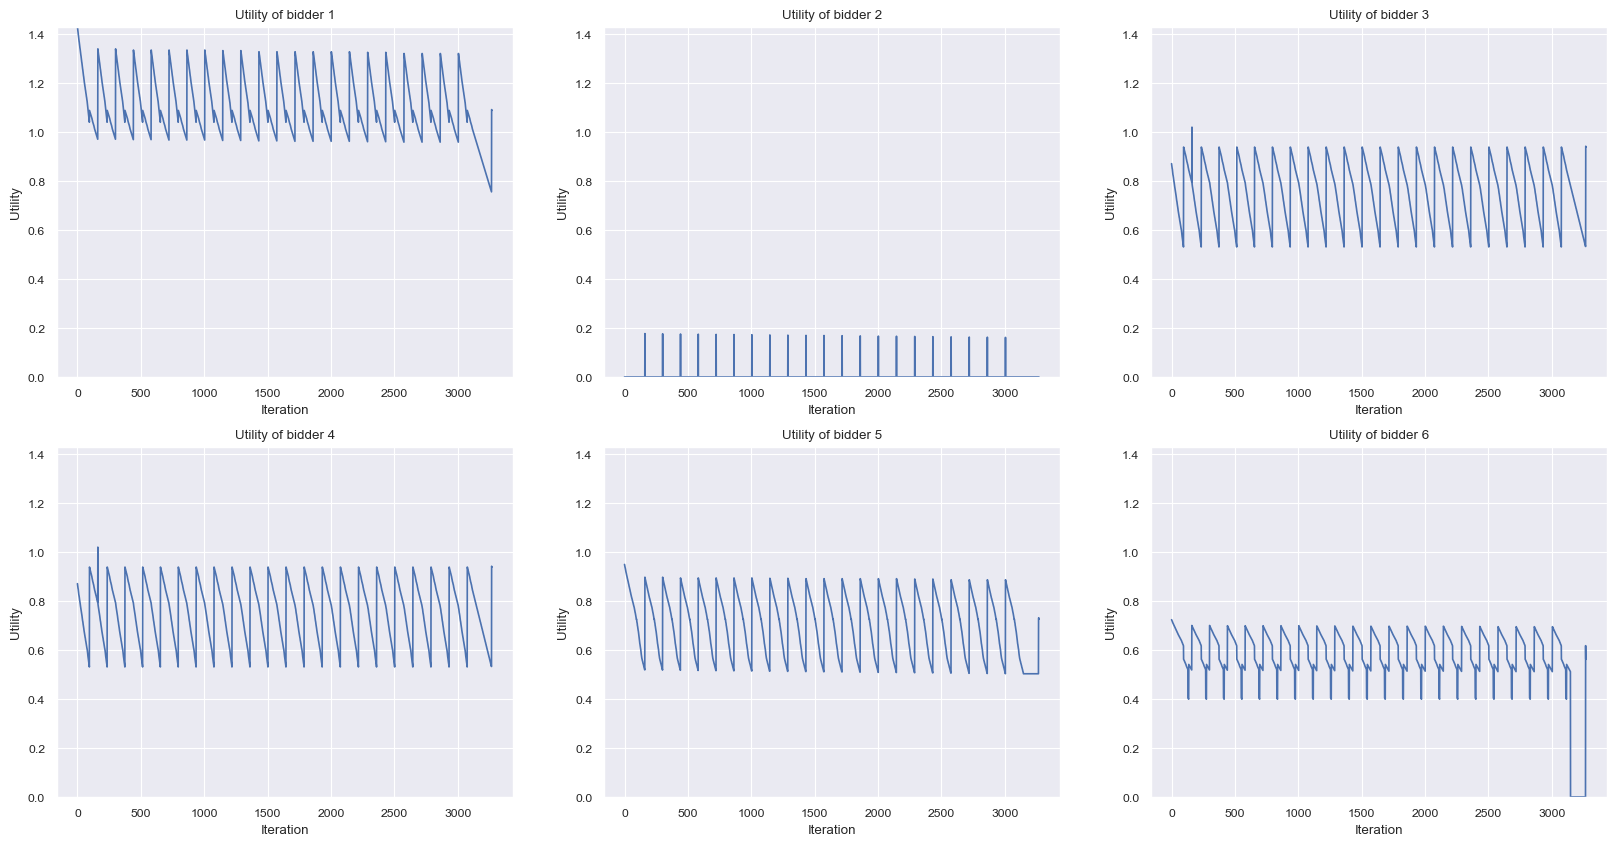

In [ ]:
from math import ceil

from pacing_auction import elimination

n, m = 5, 5
sim = auction.Auction(n, m)
print(sim._v)

result = sim.responses()
print_result(sim, result)
utils = result.stats["utility"]

# Create separate figure for combined plot
plt.figure(figsize=(10, 5))
for i in range(n):
    sns.lineplot(data=utils[i], label=f'Bidder {i+1}')
plt.title("Utilities of all bidders")
plt.xlabel("Iteration")
plt.ylabel("Utility")
plt.ylim(0, np.max(utils))

# plt.savefig("/Users/khalid/Desktop/honours-project-writeup/figures/utilities.png", dpi=500, bbox_inches="tight")

# Original subplots
rows = 2
cols = ceil(n / rows)
fig, ax = plt.subplots(2, cols, figsize=(20, 10))

max_util = np.max(utils)

for axis in ax.flatten():
    axis.set_ylim(0, max_util)

for i in range(cols):
    sns.lineplot(data=utils[i], ax=ax[0, i])
    ax[0, i].set_title(f"Utility of bidder {i + 1}")
    ax[0, i].set_xlabel("Iteration")
    ax[0, i].set_ylabel("Utility")


    sns.lineplot(data=utils[i + cols - 1], ax=ax[1, i])
    ax[1, i].set_title(f"Utility of bidder {i + 4}")
    ax[1, i].set_xlabel("Iteration")
    ax[1, i].set_ylabel("Utility")
plt.show()
